# Checkpoint 1

### Read This First
**1. Use the constants provided in the cell below. Do not use your own constants.**

**2. Put the code that produces the output for a given task in the specific cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. Additional cells need to be in the proper order such that your code runs the first time through.**

The Coulomb law is given by:

$
\Large
\begin{align}
F(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r^{2}} \left( \frac{r}{r_{0}} \right)^{\alpha},
\end{align}
$

where $r_{0}$ is the Bhor radius, given by:

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

The electric potential is given by:

$
\Large
\begin{align}
V(r) = \int_{r}^{\infty} F(r^{\prime}) dr^{\prime}
\end{align}
$

Use the following constants:
* $\frac{\hbar^{2}}{2m} = 0.0380998\ nm^{2} eV$ (called `c1` below)
* $\frac{e^{2}}{4 \pi \epsilon_{0}} = 1.43996\ nm\ eV$ (called `c2` below)
* $r_{0} = 0.0529177\ nm$ (called `r0` below)
* Planck constant $h = 6.62606896\times10^{-34} J s$ (`h`)
* Speed of light $c = 299792458\ m/s$ (`c`)

In [18]:
# add imports here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from scipy.optimize import brentq

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

In [20]:
# Constants (use these)
c1 = 0.0380998 # nm^2 eV
c2 = 1.43996 # nm eV
r0 = 0.0529177 # nm
h  = 6.62606896e-34 # J s
c  = 299792458. # m/s
hc = 1239.8419 # eV nm

## Task 1

Write a code that calculates $V(r)$ numerically for $\alpha = 0.01$ and plots it for $r$ = 0.01...1 nm. Remember to label the axes.

In [21]:
alpha = 0.01
r_min = 0.01
r_max = 1
interval = 0.01

In [22]:
def calc_force(r, alpha):
    return -1*c2*r**(-2)*(r/r0)**alpha

In [23]:
def potential_numerical(r_lower, alpha):
    ans, err = quad(calc_force, r_lower, np.inf, args=(alpha,))
    return ans

In [24]:
### TASK 1
#where r_lower_array is array from 0.01...1
#returns an array
def get_V_array(r_lower_array, alpha):
    potential_array = np.zeros(len(r_lower_array))
    for i in range(len(r_lower_array)):
        potential_array[i] = potential_numerical(r_lower_array[i], alpha)
    return potential_array

In [25]:
r_lower_array = np.arange(r_min, r_max + interval, interval)
potential_array = get_V_array(r_lower_array, alpha)

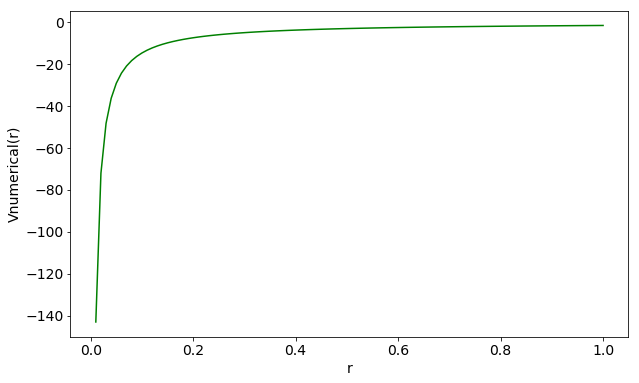

In [26]:
### TASK 1
# Plot V(r) here!
plt.plot(r_lower_array, potential_array, 'g')
plt.xlabel('r')
plt.ylabel('Vnumerical(r)')
plt.show()

## Task 2

In addition to (1), the test below will compare the analytic expression for $𝑉(r)$ with the numerically obtained values for $r$ = 0.01,0.02...1 nm. The biggest absolute difference $diff = max |V_{exact}(r) − V_{numerical}(r)|$ must be smaller than 10$^{−5}$ eV. There is nothing else for you to do.

In [27]:
# We will call your function for one value of r and alpha = 0.01. There will be more tests!
potential_numerical(0.5, 0.01)

-2.975081858428647

## Task 3

In addition to (2), calculate the first 2 energy levels (eigenvalues of $H$) for $\alpha = 0, 0.01$ and print out the values in eV. The values must be accurate to 0.01 eV. This requires sufficiently large $r_{max}$ and $N$. Plot the difference $\Delta E$ between the two energies for $\alpha = 0, 0.01$. Remember to label the axes.

In [28]:
r_maximum = 4
N = 2000
start = r_maximum/N
k = 2

In [29]:
def get_r_array(start, r_maximum, N):
    return np.linspace(start, r_maximum, N)

In [30]:
def get_delta_r(r_maximum, N):
    return r_maximum/N

In [31]:
### TASK 3
def energy_levels(alpha):
    new_V_array = get_V_array(new_r_array, alpha)
    V_diagonals = [new_V_array]
    V_matrix = diags(V_diagonals, [0])
    H = -1*c1*delta_matrix + V_matrix
    eigvals = eigs(H, k, which="SR")[0]
    eigvals = np.real(eigvals)
    E1 = eigvals[0]
    E2 = eigvals[1]
    return E1, E2

In [32]:
new_r_array = get_r_array(start, r_maximum, N)

In [33]:
delta_diagonals = [np.full((N),  -2),
             np.full((N-1), 1),
             np.full((N-1), 1)]
delta_r = get_delta_r(r_maximum, N)
delta_matrix = (1/(delta_r**2))*diags(delta_diagonals, [0, -1, 1])

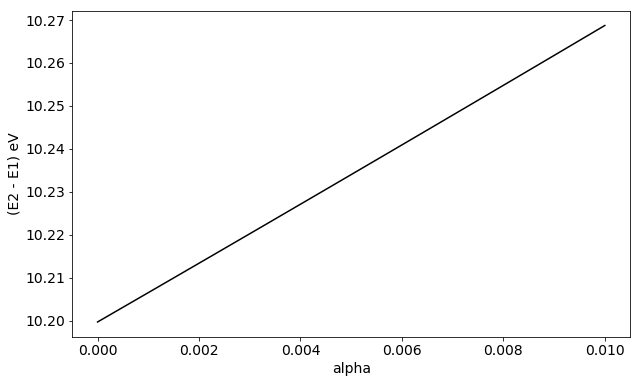

In [34]:
### TASK 3
# Plot DeltaE(alpha) for alpha = 0,...,0.01 here!
alpha_array = np.linspace(0, 0.01, 10)
delta_E_array = np.zeros(len(alpha_array))

for i in range(len(alpha_array)):
    E_levels = energy_levels(alpha_array[i])
    delta_E_array[i] = E_levels[1] - E_levels[0]
    
plt.plot(alpha_array, delta_E_array, 'k')
plt.xlabel('alpha')
plt.ylabel('(E2 - E1) eV')
plt.show()

In [35]:
# Print out the energy levels for alpha = 0, 0.01.
e_levels_0 = energy_levels(0.0)
e_levels_0_01 = energy_levels(0.01)
print ("alpha = 0.00:", e_levels_0)
print ("alpha = 0.01:", e_levels_0_01)

alpha = 0.00: (-13.600759577187002, -3.4011000744962137)
alpha = 0.01: (-13.803085747045612, -3.5343628301157524)


## Task 4

In addition to (3), assuming that the transition between the 1st excited and the ground state corresponds to the wavelength $\lambda = 121.5 \pm 0.1$ nm, what is the maximum value of $\alpha_{max} > 0$ consistent with this measurement (i.e., the largest $\alpha_{max} > 0$ such that the predicted and measured wavelengths differ by less than 0.1 nm)?

In [36]:
def E_func(alpha):
    E_levels = energy_levels(alpha)
    delta_E = E_levels[1] - E_levels[0]
    return delta_E - hc/(121.5-0.1)

In [37]:
### TASK 4
def find_alpha_max():
    alpha_max = brentq(E_func, 0, 0.01)
    return alpha_max

In [38]:
# Run the function and print alpha_max.
alpha_max = find_alpha_max()
print ("alpha_max:", alpha_max)

alpha_max: 0.001930690762661799


## Task 5

Improve the accuracy of the computation of the two energy levels to 0.001 eV and find $\alpha_{max}$ assuming the wavelength $\lambda = 121.503 \pm 0.01$ nm.

In [39]:
r_maximum = 4
N = 4000
start = r_maximum/N
#takes long time

In [40]:
def E_func_improved(alpha):
    E_levels = energy_levels(alpha)
    delta_E = E_levels[1] - E_levels[0]
    return delta_E - hc/(121.503-0.01)

In [41]:
### TASK 5
def energy_levels_improved(alpha):
    new_V_array = get_V_array(new_r_array, alpha)
    V_diagonals = [new_V_array]
    V_matrix = diags(V_diagonals, [0])
    H = -1*c1*delta_matrix + V_matrix
    eigvals = eigs(H, k, which="SR")[0]
    eigvals = np.real(eigvals)
    E1 = eigvals[0]
    E2 = eigvals[1]
    return E1, E2

def find_alpha_max_improved():
    alpha_max = brentq(E_func_improved, 0, 0.01)
    return alpha_max

In [42]:
# Run the function and print alpha_max.
e_levels_0_01 = energy_levels_improved(0.01)
print ("alpha = 0.01:", e_levels_0_01)
# Run the function and print alpha_max.
alpha_max_improved = find_alpha_max_improved()
print ("alpha_max:", alpha_max_improved)

alpha = 0.01: (-13.803085747047563, -3.5343628301190337)
alpha_max: 0.0007888667521146894


## Task 6

How would one achieve the same accuracy with significantly smaller matrices? Hint: can we represent $R$ from Eq. (1) as a linear combination of functions that solve the "unperturbed" equation, and translate this into an eigenproblem for a certain $N \times N$ matrix, with $N < 100$?

In [49]:
r_maximum = 2
N = 99
start = r_maximum/N
epsilon = 0.0002875

In [50]:
### TASK 6
def energy_levels_best(alpha):
    new_V_array = get_V_array(new_r_array, alpha)
    V_diagonals = [new_V_array]
    V_matrix = diags(V_diagonals, [0])
    eigvals = eigs(V_matrix, k, which="SR")[0]
    eigvals = np.real(eigvals)
    E1 = e_levels_0[0] + epsilon*eigvals[0]
    E2 = e_levels_0[1] + epsilon*eigvals[1]
    return E1, E2

def find_alpha_max_best():
    alpha_max = brentq(E_func_improved, 0, 0.01)
    return alpha_max

In [51]:
e_levels_0 = energy_levels_improved(0.0)

In [52]:
# Run the function and print alpha_max.
e_levels_0_01 = energy_levels_best(0.01)
print ("alpha = 0.01:", e_levels_0_01)
# Run the function and print alpha_max.
alpha_max_best = find_alpha_max_best()
print ("alpha_max:", alpha_max_best)

alpha = 0.01: (-13.803106860182488, -3.5029774343239244)
alpha_max: 0.0007888667526147852


In [53]:
def energy_levels_best2(alpha):
    new_V_array = get_V_array(new_r_array, alpha) - get_V_array(new_r_array, 0)
    V_diagonals = [new_V_array]
    V_matrix = diags(V_diagonals, [0])
    eigvals = eigs(V_matrix, k, which="SR")[0]
    eigvals = np.real(eigvals)
    E1 = e_levels_0[0] + eigvals[0]
    E2 = e_levels_0[1] + eigvals[1]
    return E1, E2

In [54]:
e_levels_0_01 = energy_levels_best2(0.01)
print ("alpha = 0.01:", e_levels_0_01)

alpha = 0.01: (-13.87557918008591, -3.675906776053763)
